In [67]:
# -*- coding: utf-8 -*-

## standard packages
import numpy as np
import os
import datetime
from importlib import reload

import configparser
import json

## Database
import sqlite3

import matplotlib.pyplot as plt

import sklearn

import src.utils as utils

In [210]:
database.close()
database = utils.DataBase(os.getcwd() + "/src/DataBase/carStats.db")

In [211]:
database.connect()

In [212]:
cursor = database.getCursor()
adData = database.execute("""SELECT * FROM car""")

In [213]:
adData = np.array(adData)
adData.shape

(768, 46)

In [219]:
adData[0]

array(['1.396 cm³', 'Civic 1.4i ,', 'No Information', None,
       'No Information', 'PETROL', 'Honda', '06.09.2014', 'No Information',
       'Nürnberg',
       'BJ:1995,  ZV ,Servo, el.Fe., Airbags, 2-Hand, Im Auftragt\nbevorzugter Verkauf an\n Händler, gewerbliche Käufer oder Export,\n \nmehr am Tel. Das Fahrzeug ist dem Alter und der Laufleistung entsprechend in gutem Zustand\nLIEFERUNG   DEUTSCHLANDWEIT   MÖGLICH!\nKaufe Autos aller Art\nNehmen Ihren gebrauchten zu einem fairen Preis\nin Zahlung - Umtausch - PKWs alle Art \nSofortige Barzahlung \nSeriöse Abwicklung - Sofortige Abmeldung.\nDieses Angebot ist unverbindlich.\nTippfehler keine Haftung!\nIrrtümer und Zwischenverkauf vorbehalten!\nAlle Eingaben ohne Gewähr.\nGerne beraten wir Sie auch am Wochenende\nГОВОРИМ ПО РУССКИ\nKURZZEIT 5 TAGE UND ZOLL KENNZEICHEN vor  Ort ERHÄLTLICH\nWEITERE FAHRZEUGE FINDEN SIE AUF UNSERER WEBSEITE',
       6, 'No Information', 199.0, '11000', '2017-08-06', 'Car', 'True',
       'Benzin', 'Civi

In [235]:
cursor = database.getCursor()
keys = []
for desc in cursor.description:
    keys.append(desc[0])
for i, v in enumerate(keys):
    print (i, v)

0 cubiccapacity
1 adspecificsmodeldescription
2 manufacturercolorname
3 featurevariants
4 consumption
5 adspecificsfuel
6 adspecificsmake
7 firstseen
8 climatisation
9 dealercity
10 description
11 adfirstregmonth
12 interior
13 adprice
14 adspecificsmakeid
15 lastseen
16 adsegment
17 isdealer
18 fuel
19 adspecificsmodel
20 adspecificsmakemodel
21 hu
22 firstregistration
23 adcurrency
24 parkassist
25 adspecificshsn
26 adid
27 airbag
28 adcondition
29 sellertype
30 numberofpreviousowners
31 color
32 category
33 adspecificsmodelid
34 mileage
35 emission
36 features
37 numseats
38 countryversion
39 emissionssticker
40 dealerzip
41 adfirstregyear
42 power
43 doorcount
44 dealercountry
45 transmission


In [233]:
adData[0]

array(['1.396 cm³', 'Civic 1.4i ,', 'No Information', None,
       'No Information', 'PETROL', 'Honda', '06.09.2014', 'No Information',
       'Nürnberg',
       'BJ:1995,  ZV ,Servo, el.Fe., Airbags, 2-Hand, Im Auftragt\nbevorzugter Verkauf an\n Händler, gewerbliche Käufer oder Export,\n \nmehr am Tel. Das Fahrzeug ist dem Alter und der Laufleistung entsprechend in gutem Zustand\nLIEFERUNG   DEUTSCHLANDWEIT   MÖGLICH!\nKaufe Autos aller Art\nNehmen Ihren gebrauchten zu einem fairen Preis\nin Zahlung - Umtausch - PKWs alle Art \nSofortige Barzahlung \nSeriöse Abwicklung - Sofortige Abmeldung.\nDieses Angebot ist unverbindlich.\nTippfehler keine Haftung!\nIrrtümer und Zwischenverkauf vorbehalten!\nAlle Eingaben ohne Gewähr.\nGerne beraten wir Sie auch am Wochenende\nГОВОРИМ ПО РУССКИ\nKURZZEIT 5 TAGE UND ZOLL KENNZEICHEN vor  Ort ERHÄLTLICH\nWEITERE FAHRZEUGE FINDEN SIE AUF UNSERER WEBSEITE',
       6, 'No Information', 199.0, '11000', '2017-08-06', 'Car', 'True',
       'Benzin', 'Civi

In [237]:
def dataToJson(keys, valueList):
    returnDict = dict()
    
    for value in valueList:
        returnDict[value[26]] = dict()
        for i in range(len(keys)):
            returnDict[value[26]][keys[i]] = value[i]
                
    return returnDict

adDict = dataToJson(keys, adData)
  

In [223]:
from collections import Counter

In [240]:
adDict[247255040]

{'adcondition': 'USED',
 'adcurrency': 'EUR',
 'adfirstregmonth': 7,
 'adfirstregyear': 1994,
 'adid': 247255040,
 'adprice': 150.0,
 'adsegment': 'Car',
 'adspecificsfuel': 'PETROL',
 'adspecificshsn': None,
 'adspecificsmake': 'Opel',
 'adspecificsmakeid': '19000',
 'adspecificsmakemodel': 'Opel Corsa',
 'adspecificsmodel': 'Corsa',
 'adspecificsmodeldescription': 'Corsa Swing',
 'adspecificsmodelid': '10',
 'airbag': 'No Information',
 'category': 'Kleinwagen',
 'climatisation': 'No Information',
 'color': None,
 'consumption': '≈ 6,5 l/100km (kombiniert)≈ 8,6 l/100km (innerorts)≈ 5,3 l/100km (außerorts)',
 'countryversion': 'No Information',
 'cubiccapacity': '1.195 cm³',
 'dealercity': 'Hohenstein-Ernstthal ',
 'dealercountry': 'DE',
 'dealerzip': 9337,
 'description': 'Auto wird als Bastler Fahrzeug ohne TÜV Verkauf .\n1.2l Motor läuft Gut.\nNeues Sport Fahrwerk von TA Technix verbaut und eingetragen.\nScharfe Nockenwelle verbaut und eingetragen daher geschätzt 60 PS.\nBei Intere

In [224]:
Counter(adData[:, 18])

Counter({'Andere': 1,
         'Benzin': 646,
         'Benzin, E10-geeignet': 97,
         'Diesel': 14,
         'No Information': 10})

In [226]:
for i in range(len(adData[0])):
    print(i, keys[i], Counter(adData[:, i]))
    print()

0 cubiccapacity Counter({'1.598 cm³': 73, 'No Information': 56, '1.299 cm³': 55, '1.149 cm³': 38, '1.390 cm³': 35, '1.389 cm³': 33, '973 cm³': 28, '999 cm³': 25, '1.242 cm³': 23, '1.043 cm³': 22, '1.195 cm³': 20, '1.597 cm³': 19, '1.108 cm³': 17, '1.391 cm³': 15, '1.239 cm³': 14, '1.998 cm³': 14, '1.796 cm³': 13, '1.781 cm³': 13, '998 cm³': 13, '1.124 cm³': 12, '1.297 cm³': 12, '954 cm³': 11, '1.171 cm³': 11, '1.596 cm³': 9, '1.587 cm³': 8, '1.581 cm³': 8, '1.988 cm³': 7, '1.360 cm³': 7, '1.984 cm³': 6, '1.595 cm³': 5, '993 cm³': 5, '1.199 cm³': 5, '1.119 cm³': 5, '1.289 cm³': 5, '1.272 cm³': 5, '989 cm³': 5, '1.840 cm³': 4, '1.324 cm³': 4, '1.834 cm³': 4, '2.544 cm³': 4, '899 cm³': 3, '1.298 cm³': 3, '1.396 cm³': 3, '1.370 cm³': 3, '1.488 cm³': 3, '1.489 cm³': 3, '1.964 cm³': 2, '1.731 cm³': 2, '1.761 cm³': 2, '1.588 cm³': 2, '1.200 cm³': 2, '1.991 cm³': 2, '1.783 cm³': 2, '1.799 cm³': 2, '796 cm³': 2, '1.388 cm³': 2, '1.753 cm³': 2, '1.116 cm³': 2, '1.392 cm³': 2, '847 cm³': 2, '1.34

IndexError: list index out of range

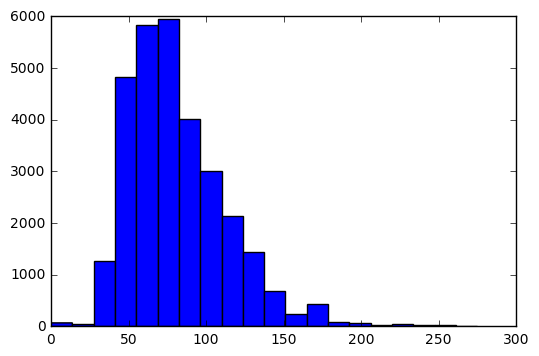

In [201]:
power = processData(adData[:, 26])
power.sort()
plt.hist(power[:-10], bins=20)
plt.show()

In [202]:
string = adData[5, 25]
string.find('\xa0'), string[-4]

(3, '\xa0')

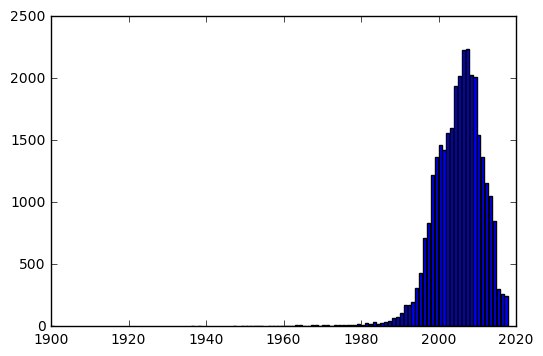

In [204]:
count = Counter(adData[:, 4])
count.pop(None)
plt.bar(count.keys(), count.values())
plt.show()

In [205]:
mileage = []
for value in adData[:, 24]:
    if 'No Information' not in value:
        mileage.append(int(value[:-3].replace('.', '')))
len(mileage)

31438

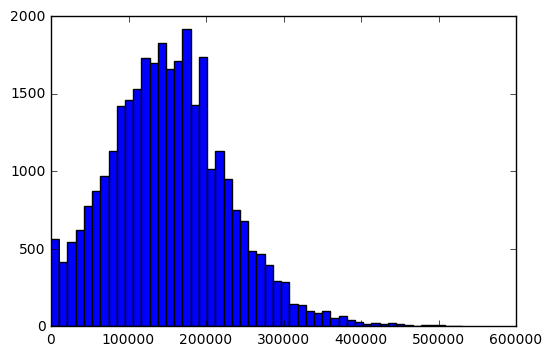

In [207]:
mileage.sort()
plt.hist(mileage[:-50], bins=50)
plt.show()

In [208]:
ccap = []
for value in adData[:, 25]:
    if 'No Information' not in value:
        ccap.append(int(value[:-3].replace('.', '')))
len(ccap)

23738

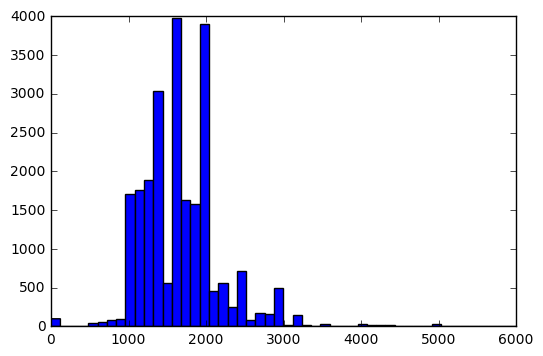

In [209]:
ccap.sort()
plt.hist(ccap[:-10], bins=50)
plt.show()